In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Actigraph.csv')
df1 = pd.read_csv('April74.csv',names = ['name','count','tim1','tim2','tim3','HR1'])

In [3]:
df.head(),df1.head()

(   Unnamed: 0  Axis1  Axis2  Axis3  Steps    HR  Inclinometer Off  \
 0           9      0      0      0      0  70.0                 1   
 1          10      0      0      0      0  71.0                 1   
 2          11      0      0      0      0  71.0                 1   
 3          12      0      0      0      0  71.0                 1   
 4          13      0      0      0      0  71.0                 1   
 
    Inclinometer Standing  Inclinometer Sitting  Inclinometer Lying  \
 0                      0                     0                   0   
 1                      0                     0                   0   
 2                      0                     0                   0   
 3                      0                     0                   0   
 4                      0                     0                   0   
 
    Vector Magnitude  day      time  
 0               0.0    1  09:12:09  
 1               0.0    1  09:12:10  
 2               0.0    1  09:12:11 

In [4]:
df.drop(df.index[38651:67874],inplace=True)

In [6]:
df['HR1'] = df1['HR1'].values
df.head()

,Unnamed: 0,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,day,time,HR1
0,9,0,0,0,0,70.0,1,0,0,0,0.0,1,09:12:09,74.0000
1,10,0,0,0,0,71.0,1,0,0,0,0.0,1,09:12:10,72.0000
2,11,0,0,0,0,71.0,1,0,0,0,0.0,1,09:12:11,65.0000
3,12,0,0,0,0,71.0,1,0,0,0,0.0,1,09:12:12,71.6805
4,13,0,0,0,0,71.0,1,0,0,0,0.0,1,09:12:13,65.0000


In [7]:
df = df[['time','HR','HR1']]
df.head()

,time,HR,HR1
0,09:12:09,70.0,74.0000
1,09:12:10,71.0,72.0000
2,09:12:11,71.0,65.0000
3,09:12:12,71.0,71.6805
4,09:12:13,71.0,65.0000


In [8]:
df['time'] = pd.to_datetime(df['time'])
df.head()

<ipython-input-8-512e753fe36b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


,time,HR,HR1
0,2024-04-09 09:12:09,70.0,74.0000
1,2024-04-09 09:12:10,71.0,72.0000
2,2024-04-09 09:12:11,71.0,65.0000
3,2024-04-09 09:12:12,71.0,71.6805
4,2024-04-09 09:12:13,71.0,65.0000


<Axes: xlabel='HR', ylabel='Density'>

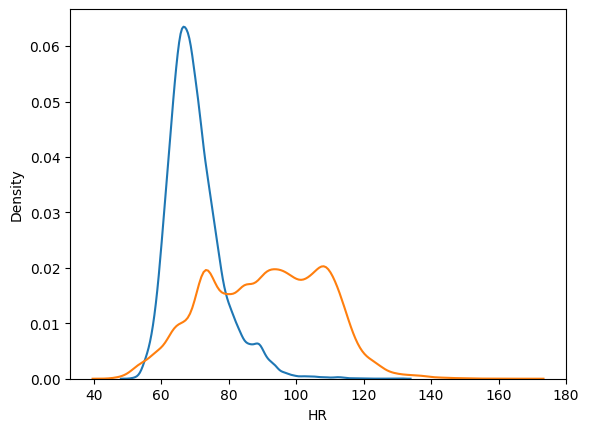

In [9]:
sns.kdeplot(df['HR'])
sns.kdeplot(df['HR1'])

In [10]:
from scipy import fftpack
#obtain a frequency domain representation of the data using fftpack
def plot_fft(data):
    y = data
    N = data.size # data size
    T = 1.0 / 100 # inverse of sampling rate
    x = np.linspace(0.0, N*T, N)
    yf = np.abs(fftpack.fft(y))
    xf = fftpack.fftfreq(N, d=T)

    fig, ax = plt.subplots()
    ax.plot(np.abs(xf), np.abs(yf))
    #truncate x axis to 50Hz
    ax.set_xlim(-1, 20)
    plt.show()

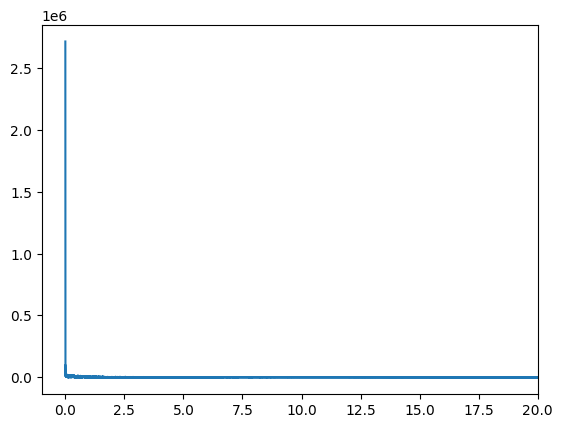

In [11]:
y = df['HR'].values
plot_fft(y)

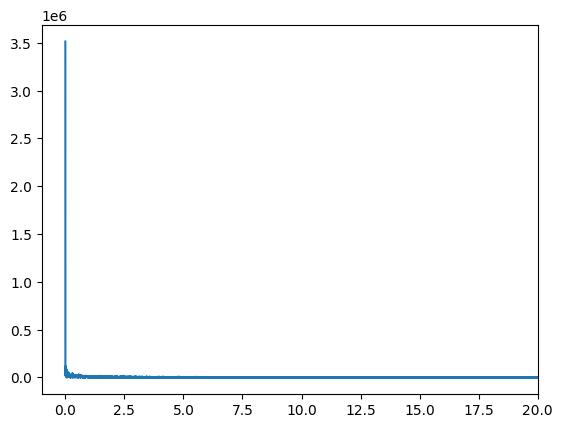

In [12]:
y = df['HR1'].values
plot_fft(y)

<Figure size 1200x600 with 0 Axes>

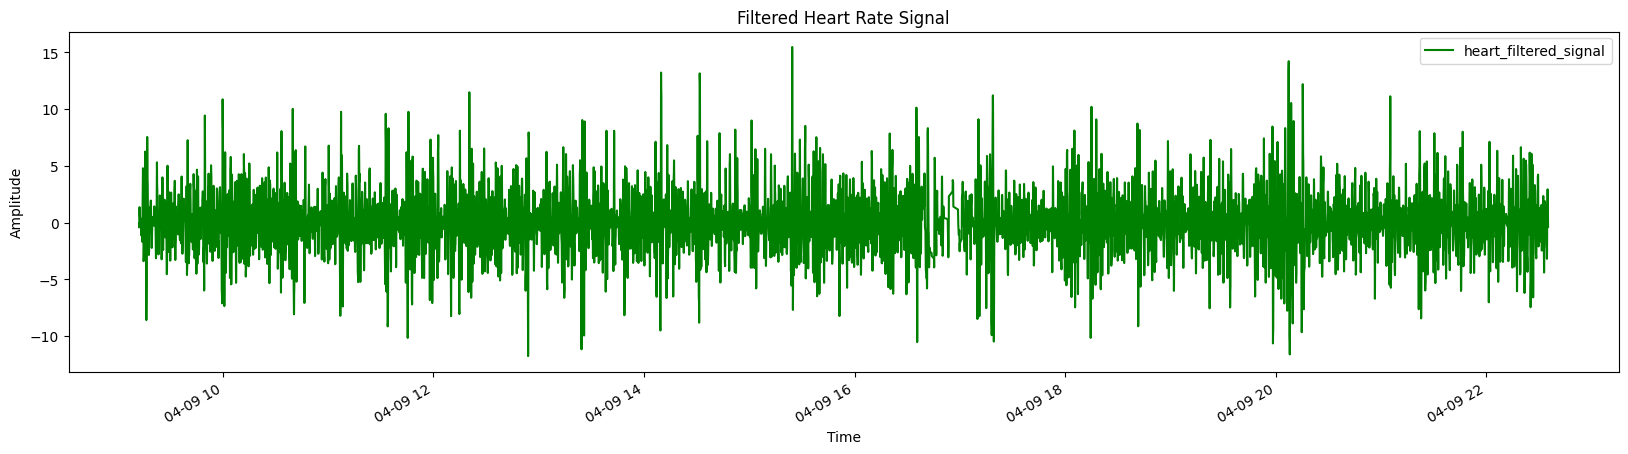

In [13]:
from scipy.signal import butter, filtfilt, find_peaks

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

lowcut = 1
highcut = 4.0
fs = 100
order = 3


df['heart_filtered_signal'] = butter_bandpass_filter(df['HR'], lowcut, highcut, fs, order=order)


plt.figure(figsize=(12, 6))
df.plot(x='time', y=['heart_filtered_signal'], figsize=(20,5),color='green')
plt.title('Filtered Heart Rate Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')



plt.show()

<ipython-input-14-5291f08bdf78>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df['time'][peaks_green], signal_green[peaks_green], 'ro', markersize=5, label='Peaks',color='red')


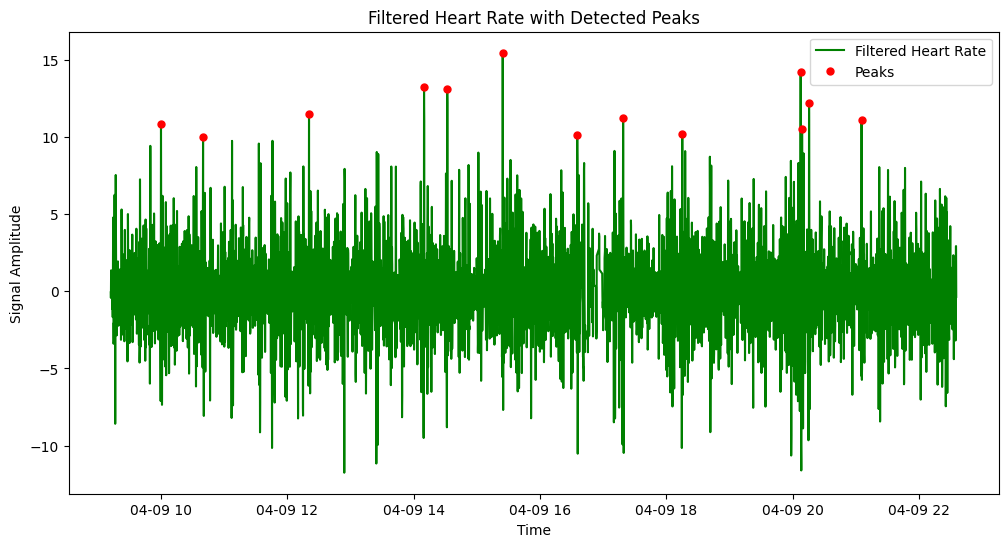

In [14]:
signal_green = df['heart_filtered_signal']
height_threshold = 10

peaks_green, _ = find_peaks(signal_green, height=height_threshold)

plt.figure(figsize=(12, 6))
plt.plot(df['time'], signal_green, label='Filtered Heart Rate',color='green')

plt.plot(df['time'][peaks_green], signal_green[peaks_green], 'ro', markersize=5, label='Peaks',color='red')

plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.title('Filtered Heart Rate with Detected Peaks')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

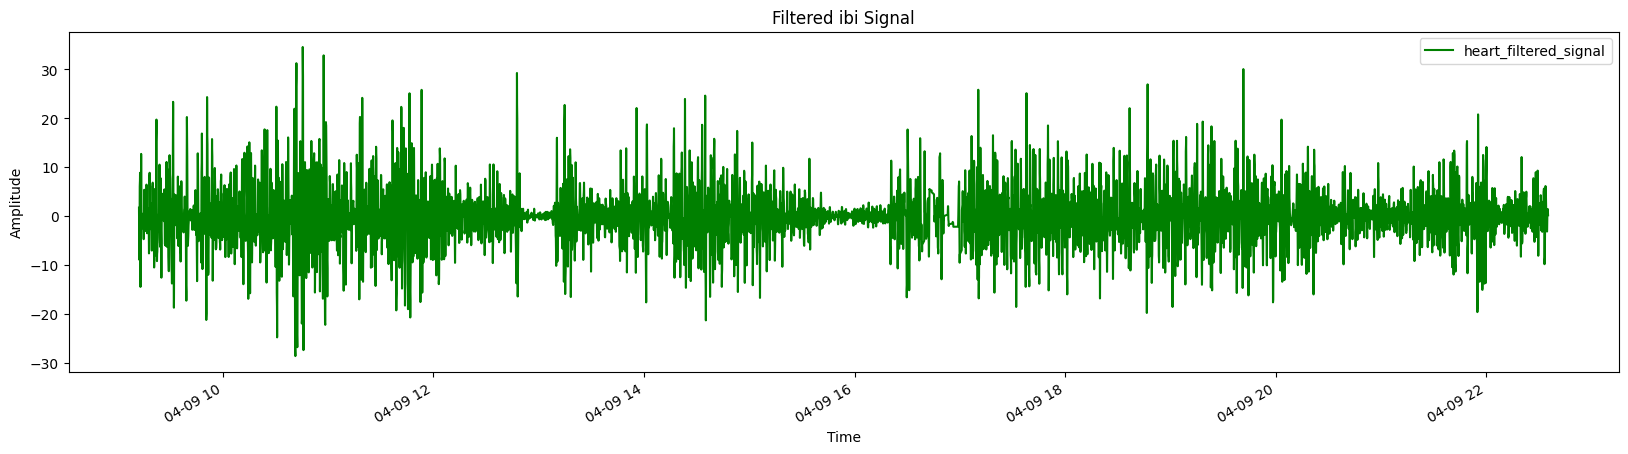

In [15]:
from scipy.signal import butter, filtfilt, find_peaks

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

lowcut = 1
highcut = 4.0
fs = 100
order = 3


df['heart_filtered_signal'] = butter_bandpass_filter(df['HR1'], lowcut, highcut, fs, order=order)


plt.figure(figsize=(12, 6))
df.plot(x='time', y=['heart_filtered_signal'], figsize=(20,5),color='green')
plt.title('Filtered ibi Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')



plt.show()

<ipython-input-16-1fd5e74dec5d>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df['time'][peaks_green], signal_green[peaks_green], 'ro', markersize=5, label='Peaks',color='red')


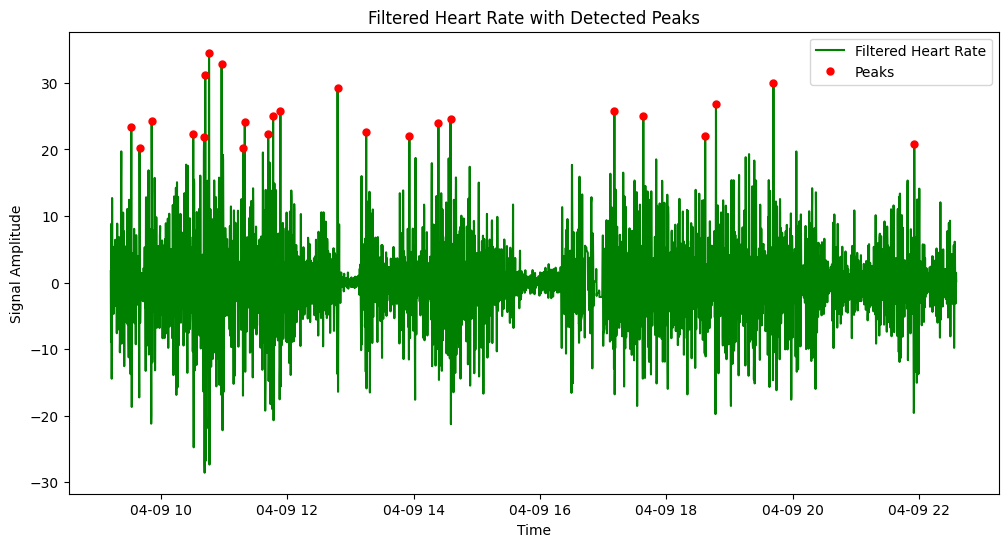

In [16]:
signal_green = df['heart_filtered_signal']
height_threshold = 20

peaks_green, _ = find_peaks(signal_green, height=height_threshold)

plt.figure(figsize=(12, 6))
plt.plot(df['time'], signal_green, label='Filtered Heart Rate',color='green')

plt.plot(df['time'][peaks_green], signal_green[peaks_green], 'ro', markersize=5, label='Peaks',color='red')

plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.title('Filtered Heart Rate with Detected Peaks')
plt.legend()
plt.show()

In [17]:
df = df.set_index('time')

In [18]:
df=df.resample('1s').interpolate()

In [19]:
df['HR30s'] = df['HR'].rolling(window =30,step=30).mean()
df['HR130s'] = df['HR1'].rolling(window =30,step=30).mean()

In [20]:
df.dropna(inplace=True)
df.head()

,HR,HR1,heart_filtered_signal,HR30s,HR130s
time,,,,,
2024-04-09 09:12:39,68.571429,82.285714,6.759143,69.847619,70.079826
2024-04-09 09:13:09,66.857143,81.142857,-1.707077,67.614286,73.780952
2024-04-09 09:13:39,65.000000,71.000000,-2.525373,65.338095,83.774488
2024-04-09 09:14:09,70.000000,98.000000,0.000197,66.533333,79.933333
2024-04-09 09:14:39,69.000000,66.000000,-2.360325,72.833333,78.066667


In [22]:
# Feature Selection
df_supervised = pd.DataFrame({
    'X': df['HR30s'],
    'y': df['HR130s']
}).dropna()

In [23]:
df_supervised.head()

,X,y
time,,
2024-04-09 09:12:39,69.847619,70.079826
2024-04-09 09:13:09,67.614286,73.780952
2024-04-09 09:13:39,65.338095,83.774488
2024-04-09 09:14:09,66.533333,79.933333
2024-04-09 09:14:39,72.833333,78.066667


In [24]:
from sklearn.model_selection import train_test_split


# Now, we can split the data into X and y for training and testing
X = df_supervised[['X']].values
y = df_supervised['y'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

In [26]:
predictions_df = pd.DataFrame({'Predictions': predictions})

# Define a function to categorize heart rates
def categorize_heart_rate(hr):
    if hr >= 60 and hr <= 100:
        return 'Good heart rate'
    else:
        return 'Bad heart rate'

# Apply the function to predictions and create a new column in DataFrame
predictions_df['Heart Rate'] = predictions_df['Predictions'].apply(categorize_heart_rate)

# Display the DataFrame
print(predictions_df)

     Predictions       Heart Rate
0      92.878120  Good heart rate
1      88.129336  Good heart rate
2      90.117199  Good heart rate
3      92.556013  Good heart rate
4      93.623569  Good heart rate
..           ...              ...
525    92.914933  Good heart rate
526    91.589690  Good heart rate
527    89.868716  Good heart rate
528    87.531136  Good heart rate
529    91.157146  Good heart rate

[530 rows x 2 columns]


In [27]:
from sklearn import metrics

LR_MAE = metrics.mean_absolute_error(y_test, predictions)
LR_MSE = metrics.mean_squared_error(y_test, predictions)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('MAE:', LR_MAE)
print('MSE:', LR_MSE)
print('RMSE:', LR_RMSE)

MAE: 12.679864603753787
MSE: 226.99742000338193
RMSE: 15.066433552881117


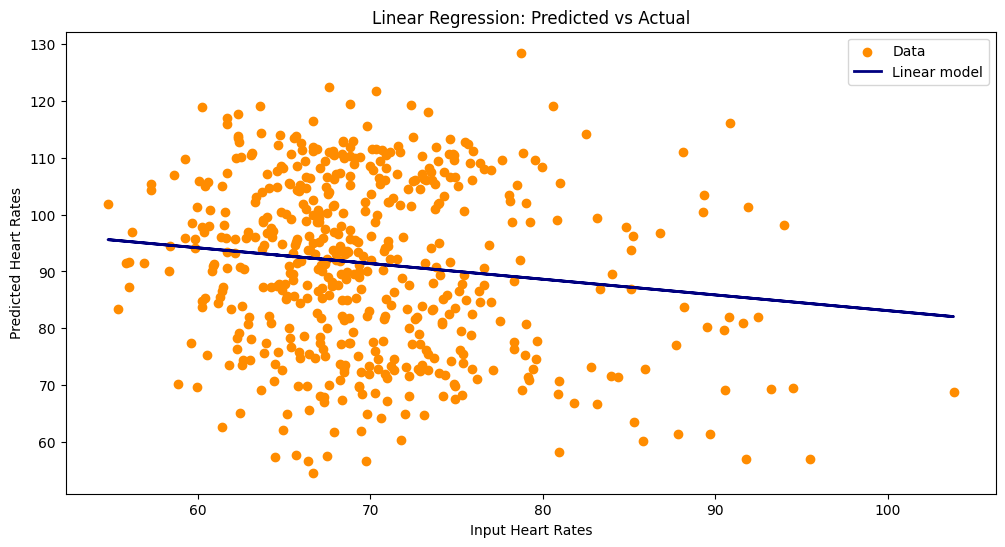

In [33]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='darkorange', label='Data')
plt.plot(X_test, predictions, color='navy', lw=2, label='Linear model')
plt.xlabel('Input Heart Rates')
plt.ylabel('Predicted Heart Rates')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.show()

In [29]:
from sklearn.svm import SVR

svr_model = SVR(kernel ='linear', C=1)
svr_model.fit(X_train,y_train)
y_pred = svr_model.predict(X_test)

In [30]:
predictions_df = pd.DataFrame({'Predictions': y_pred})

# Define a function to categorize heart rates
def categorize_heart_rate(hr):
    if hr >= 60 and hr <= 100:
        return 'Good heart rate'
    else:
        return 'Bad heart rate'

# Apply the function to predictions and create a new column in DataFrame
predictions_df['Heart Rate'] = predictions_df['Predictions'].apply(categorize_heart_rate)

# Display the DataFrame
print(predictions_df)

     Predictions       Heart Rate
0      93.326947  Good heart rate
1      88.560364  Good heart rate
2      90.555678  Good heart rate
3      93.003632  Good heart rate
4      94.075189  Good heart rate
..           ...              ...
525    93.363897  Good heart rate
526    92.033688  Good heart rate
527    90.306264  Good heart rate
528    87.959923  Good heart rate
529    91.599522  Good heart rate

[530 rows x 2 columns]


In [31]:
SVR_MAE = metrics.mean_absolute_error(y_test, y_pred)
SVR_MSE = metrics.mean_squared_error(y_test, y_pred)
SVR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', SVR_MAE)
print('MSE:', SVR_MSE)
print('RMSE:', SVR_RMSE)

MAE: 12.683901263984627
MSE: 227.4905571310621
RMSE: 15.08279009769287


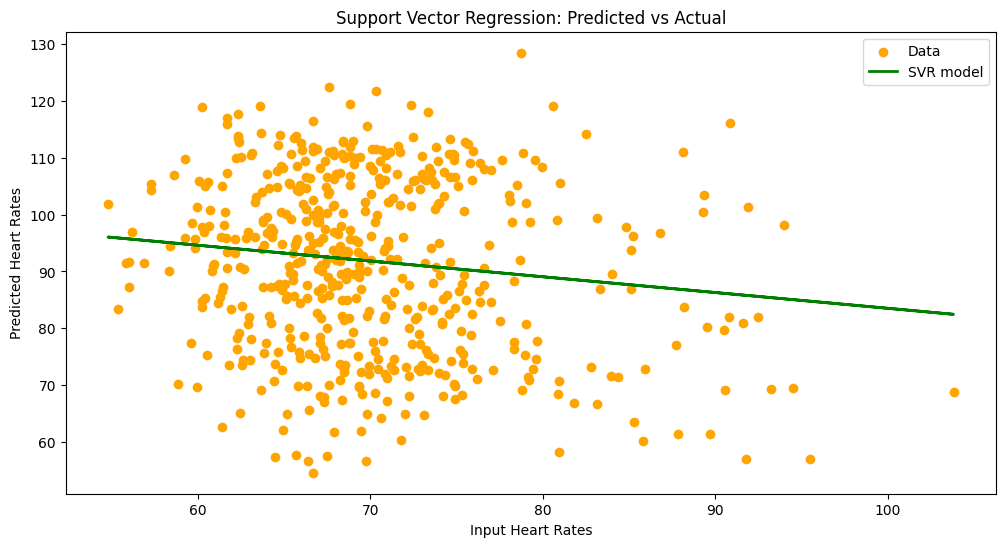

In [34]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='orange', label='Data')
plt.plot(X_test, y_pred, color='green', lw=2, label='SVR model')
plt.xlabel('Input Heart Rates')
plt.ylabel('Predicted Heart Rates')
plt.title('Support Vector Regression: Predicted vs Actual')
plt.legend()
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 9)}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')

# Performing GridSearch on the training data
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsRegressor(n_neighbors=best_k)

# Training the KNN regressor with the best parameter on the training data
knn_best.fit(X_train, y_train)

# Predicting on the test data
knn_predictions = knn_best.predict(X_test)

In [36]:
KNN_MAE = metrics.mean_absolute_error(y_test, knn_predictions)
KNN_MSE = metrics.mean_squared_error(y_test, knn_predictions)
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test, knn_predictions))
print('MAE:', KNN_MAE)
print('MSE:', KNN_MSE)
print('RMSE:', KNN_RMSE)

MAE: 13.628297372292671
MSE: 264.61732547494597
RMSE: 16.26706259516284


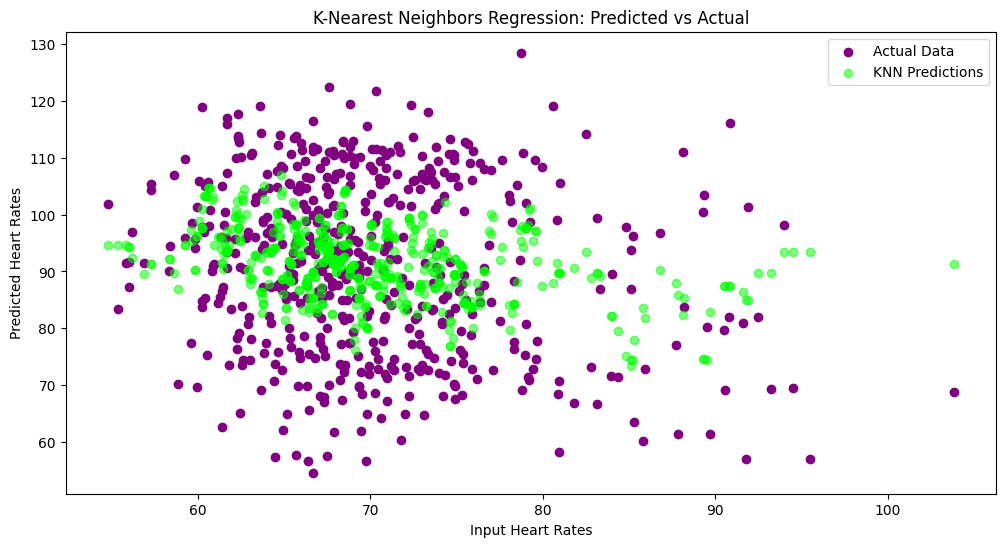

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='purple', label='Actual Data')
plt.scatter(X_test, knn_predictions, color='lime', label='KNN Predictions', alpha=0.5)
plt.xlabel('Input Heart Rates')
plt.ylabel('Predicted Heart Rates')
plt.title('K-Nearest Neighbors Regression: Predicted vs Actual')
plt.legend()
plt.show()

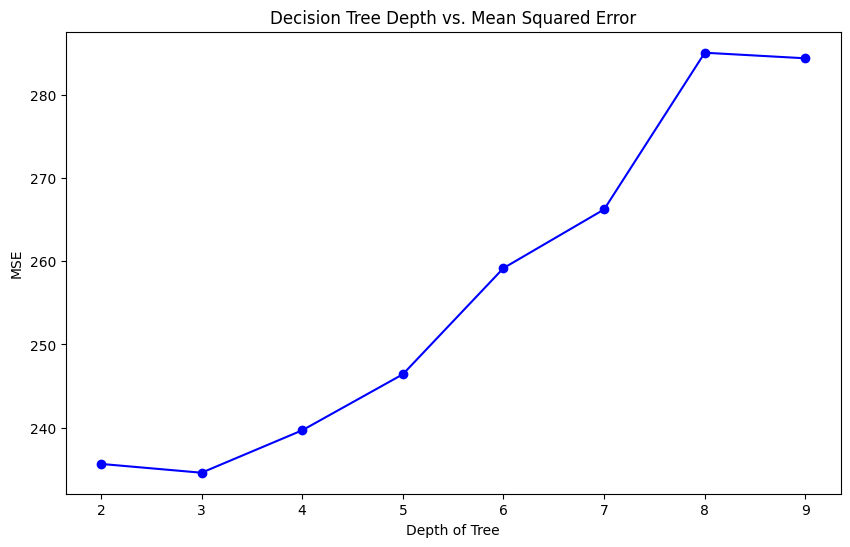

In [38]:
from sklearn.tree import DecisionTreeRegressor

# Initialize variables to track the best performance
best_depth = None
lowest_error = float('inf')
depth_errors = []

# Loop over possible depths to find the optimal
for depth in range(2, 10):
    # Initialize the Decision Tree Regressor with the current depth
    dt_model = DecisionTreeRegressor(max_depth=depth)
    dt_model.fit(X_train, y_train)  # Train the model
    dt_predictions = dt_model.predict(X_test)  # Predict on the test set
    error = metrics.mean_squared_error(y_test, dt_predictions)  # Calculate MSE

    depth_errors.append((depth, error))

    # Update the best depth if the current model performs better
    if error < lowest_error:
        best_depth = depth
        lowest_error = error

# Train a final model using the best depth
dt_best = DecisionTreeRegressor(max_depth=best_depth)
dt_best.fit(X_train, y_train)
dectree_predictions = dt_best.predict(X_test)


# Plotting decision tree depth vs. MSE
depths, errors = zip(*depth_errors)
plt.figure(figsize=(10, 6))
plt.plot(depths, errors, marker='o', linestyle='-', color='blue')
plt.title('Decision Tree Depth vs. Mean Squared Error')
plt.xlabel('Depth of Tree')
plt.ylabel('MSE')
plt.show()

In [39]:
Dectree_MAE = metrics.mean_absolute_error(y_test, dectree_predictions)
Dectree_MSE = metrics.mean_squared_error(y_test, dectree_predictions)
Dectree_RMSE = np.sqrt(metrics.mean_squared_error(y_test, dectree_predictions))
print('MAE:', Dectree_MAE)
print('MSE:', Dectree_MSE)
print('RMSE:', Dectree_RMSE)

MAE: 12.893406153306453
MSE: 234.58111307280674
RMSE: 15.316041037840254


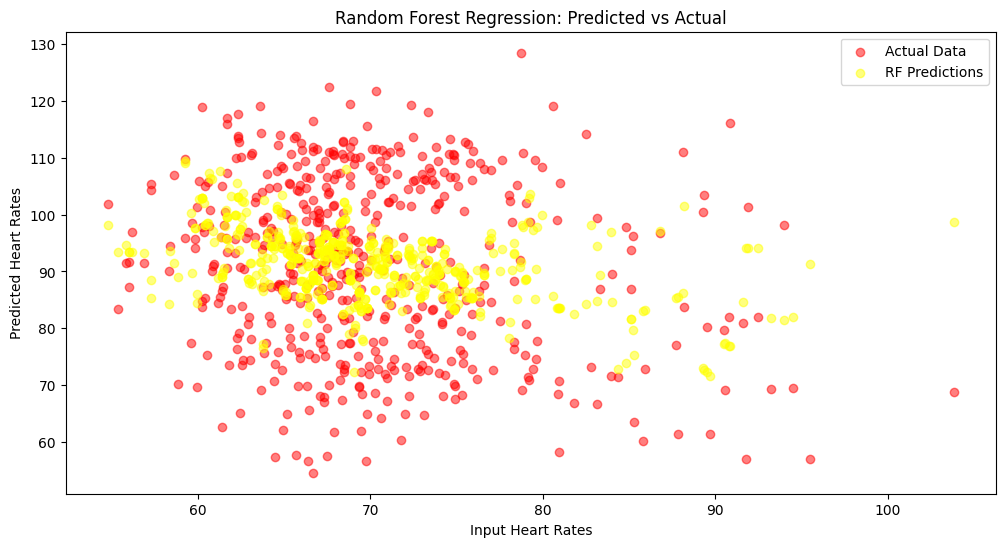

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the testing set
rf_predictions = rf_regressor.predict(X_test)

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='red', label='Actual Data',alpha=0.5)
plt.scatter(X_test, rf_predictions, color='yellow', label='RF Predictions', alpha=0.5)
plt.xlabel('Input Heart Rates')
plt.ylabel('Predicted Heart Rates')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.legend()
plt.show()

In [42]:
RF_MAE = metrics.mean_absolute_error(y_test, rf_predictions)
RF_MSE = metrics.mean_squared_error(y_test, rf_predictions)
RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
print('MAE:', RF_MAE)
print('MSE:', RF_MSE)
print('RMSE:', RF_RMSE)

MAE: 13.37896754374477
MSE: 257.13315987224803
RMSE: 16.035372146359684


In [43]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Normalize the datasets separately
scaler_df = MinMaxScaler(feature_range=(-1, 1))
scaler_df1 = MinMaxScaler(feature_range=(-1, 1))

scaled_data_df = scaler_df.fit_transform(df['HR30s'].values.reshape(-1, 1))
scaled_data_df1 = scaler_df1.fit_transform(df['HR130s'].values.reshape(-1, 1))

# Prepare data for LSTM
def series_to_supervised(data_input, data_output, n_in=1, n_out=1, dropnan=True):
    df_input = pd.DataFrame(data_input)
    df_output = pd.DataFrame(data_output)

    # Combine input and output data
    df = pd.concat([df_input.shift(i) for i in range(n_in, -n_out, -1)], axis=1)

    if dropnan:
        df.dropna(inplace=True)

    return df.values[:, :n_in], df.values[:, n_in:]

# Prepare input and output sequences for LSTM
train_X, train_y = series_to_supervised(scaled_data_df, scaled_data_df1, 1, 1)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))

# Design the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, verbose=2, shuffle=False)

# Predict
yhat = model.predict(train_X)

# Invert scaling for forecast
inv_yhat = scaler_df1.inverse_transform(yhat)

# Invert scaling for actual
inv_y = scaler_df1.inverse_transform(train_y)

Epoch 1/50
23/23 - 5s - loss: 0.3012 - 5s/epoch - 235ms/step
Epoch 2/50
23/23 - 0s - loss: 0.1745 - 227ms/epoch - 10ms/step
Epoch 3/50
23/23 - 0s - loss: 0.0525 - 217ms/epoch - 9ms/step
Epoch 4/50
23/23 - 0s - loss: 0.0248 - 158ms/epoch - 7ms/step
Epoch 5/50
23/23 - 0s - loss: 0.0240 - 125ms/epoch - 5ms/step
Epoch 6/50
23/23 - 0s - loss: 0.0233 - 133ms/epoch - 6ms/step
Epoch 7/50
23/23 - 0s - loss: 0.0223 - 129ms/epoch - 6ms/step
Epoch 8/50
23/23 - 0s - loss: 0.0216 - 129ms/epoch - 6ms/step
Epoch 9/50
23/23 - 0s - loss: 0.0208 - 136ms/epoch - 6ms/step
Epoch 10/50
23/23 - 0s - loss: 0.0201 - 131ms/epoch - 6ms/step
Epoch 11/50
23/23 - 0s - loss: 0.0195 - 128ms/epoch - 6ms/step
Epoch 12/50
23/23 - 0s - loss: 0.0190 - 145ms/epoch - 6ms/step
Epoch 13/50
23/23 - 0s - loss: 0.0185 - 189ms/epoch - 8ms/step
Epoch 14/50
23/23 - 0s - loss: 0.0181 - 181ms/epoch - 8ms/step
Epoch 15/50
23/23 - 0s - loss: 0.0177 - 179ms/epoch - 8ms/step
Epoch 16/50
23/23 - 0s - loss: 0.0175 - 187ms/epoch - 8ms/step
E

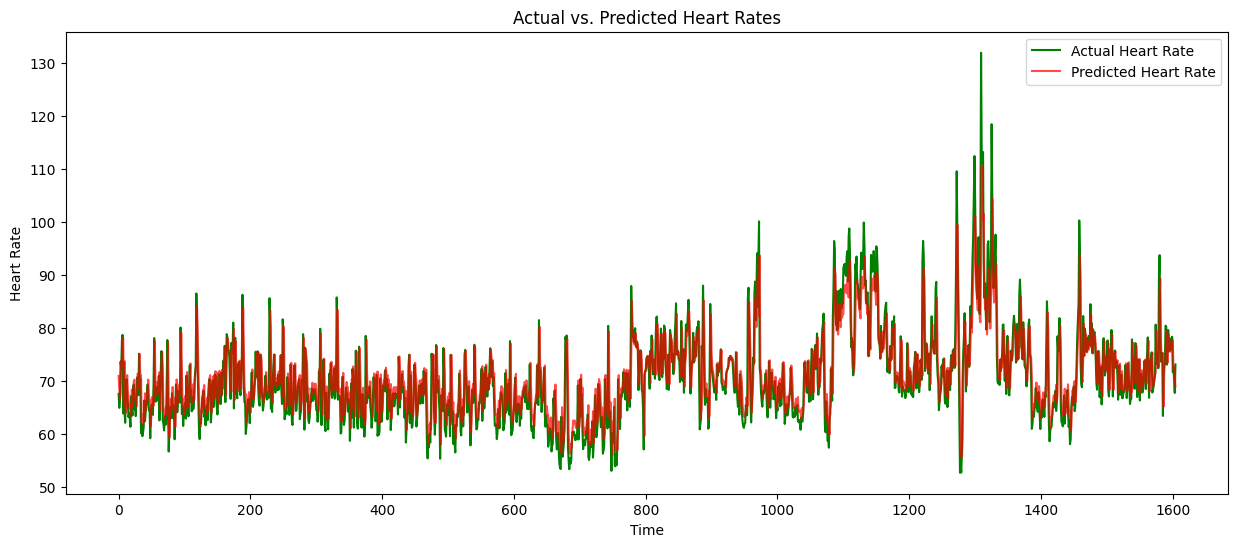

In [44]:
plt.figure(figsize=(15, 6))
plt.plot(inv_y, label='Actual Heart Rate', color='green')
plt.plot(inv_yhat, label='Predicted Heart Rate', color='red', alpha=0.7)
plt.title('Actual vs. Predicted Heart Rates')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()

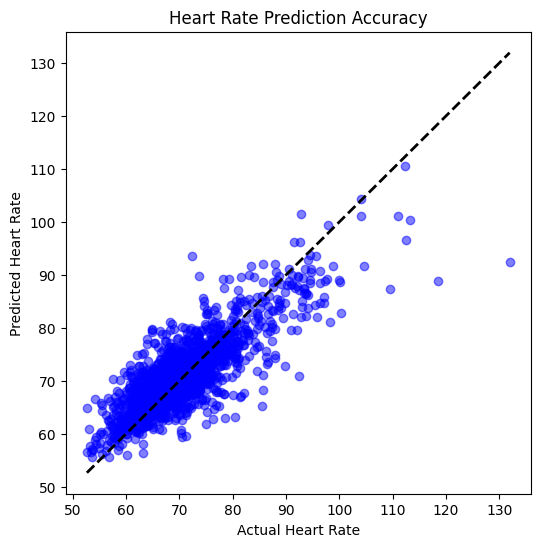

In [45]:
plt.figure(figsize=(6, 6))
plt.scatter(inv_y, inv_yhat, alpha=0.5, color='blue')
plt.title('Heart Rate Prediction Accuracy')
plt.xlabel('Actual Heart Rate')
plt.ylabel('Predicted Heart Rate')
plt.plot([inv_y.min(), inv_y.max()], [inv_y.min(), inv_y.max()], 'k--', lw=2)  # Diagonal line
plt.show()

In [46]:
LSTM_MAE = metrics.mean_absolute_error(inv_y, yhat)
LSTM_MSE = metrics.mean_squared_error(inv_y, yhat)
LSTM_RMSE = np.sqrt(metrics.mean_squared_error(inv_y, yhat))
print('MAE:', RF_MAE)
print('MSE:', RF_MSE)
print('RMSE:', RF_RMSE)

MAE: 13.37896754374477
MSE: 257.13315987224803
RMSE: 16.035372146359684


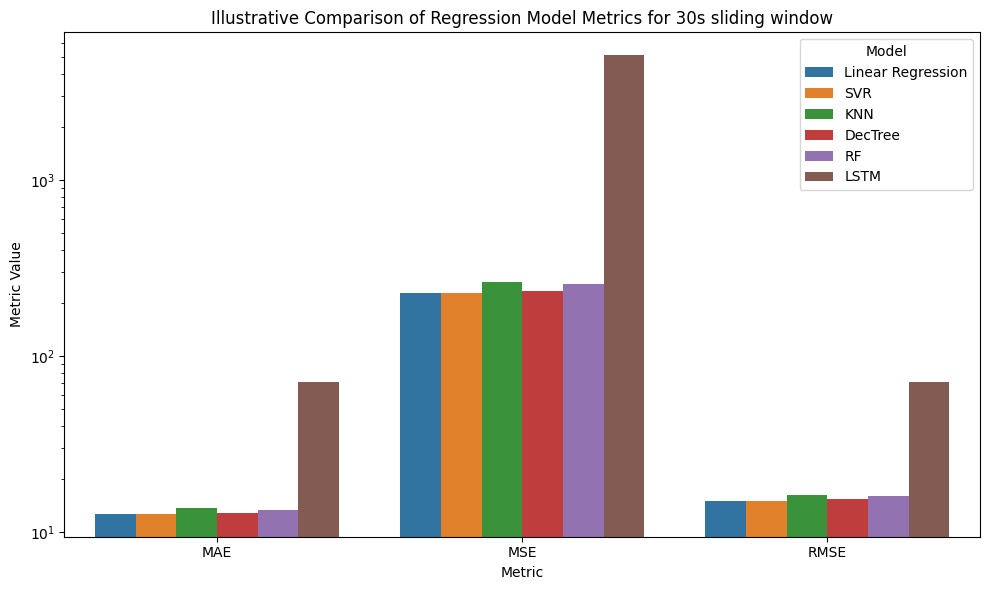

In [47]:
# Preparing data for illustrative plotting
illustrative_metrics_data = {
    'Model': ['Linear Regression', 'SVR', 'KNN','DecTree','RF','LSTM'] * 3,
    'Metric': ['MAE', 'MAE', 'MAE', 'MAE','MAE','MAE','MSE','MSE','MSE', 'MSE', 'MSE', 'MSE','RMSE','RMSE', 'RMSE', 'RMSE', 'RMSE','RMSE'],
    'Value': [
        LR_MAE, SVR_MAE, KNN_MAE,Dectree_MAE,RF_MAE,LSTM_MAE,
        LR_MSE, SVR_MSE, KNN_MSE,Dectree_MSE,RF_MSE,LSTM_MSE,
        LR_RMSE, SVR_RMSE, KNN_RMSE,Dectree_RMSE,RF_RMSE,LSTM_RMSE
    ]
}

# Creating a DataFrame
illustrative_metrics_df = pd.DataFrame(illustrative_metrics_data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=illustrative_metrics_df)
plt.title('Illustrative Comparison of Regression Model Metrics for 30s sliding window')
plt.ylabel('Metric Value')
plt.yscale('log')  # Using logarithmic scale due to large differences in MSE values
plt.legend(title='Model')
plt.tight_layout()

plt.show()